In [1]:
import numpy as np
from scipy import fftpack
from athena_read import athdf
import matplotlib.pyplot as plt
import Constants 
c=Constants.Constants()

base_dir = '../../../data/collision_denturb_M20/'
%matplotlib inline

Constants defined...


In [2]:
myfile=base_dir + "COLL.out1."+"00020"+".athdf"
d = athdf(myfile)
X,Y = np.meshgrid(d['x1f'], d['x2f'], indexing='ij')
d_shape = np.shape(d['rho'])

Text(0, 0.5, 'y')

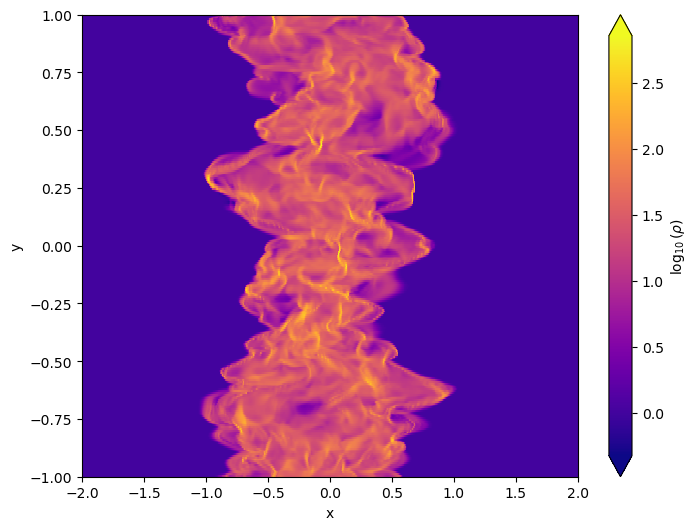

In [3]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
contour = ax.pcolormesh(X, Y, (np.log10(d['rho'])[128,:,:]).T,cmap='plasma',shading='auto')
cb1=plt.colorbar(contour,extend='both',label=r'$\log_{10}\left( \rho \right)$ ')
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.plot(x_r[128,:],d['x2v'])
# ax.plot(x_l[128,:],d['x2v'])
# ax.set_xlim(-1,1)
# ax.set_ylim(-2,2)

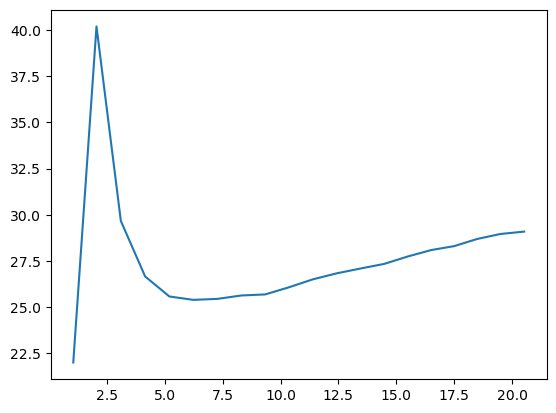

In [15]:
plt.plot(l_t[1:],rho_m_t[1:])

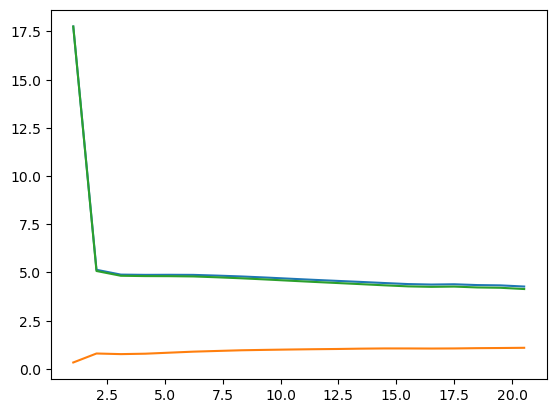

In [14]:
plt.plot(l_t[1:],M_tot_t[1:])
plt.plot(l_t[1:],M_perp_t[1:])
plt.plot(l_t[1:],M_para_t[1:])

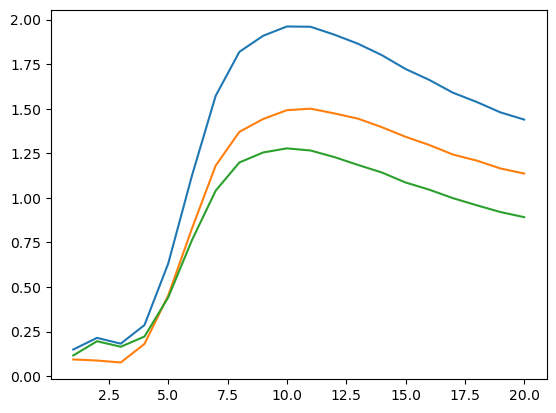

In [18]:

# plt.plot(l_t[1:],B_tot_t[1:])
# plt.plot(l_t[1:],B_perp_t[1:])
# plt.plot(l_t[1:],B_para_t[1:])
plt.plot(range(1,21),B_tot_t[1:])
plt.plot(range(1,21),B_perp_t[1:])
plt.plot(range(1,21),B_para_t[1:])


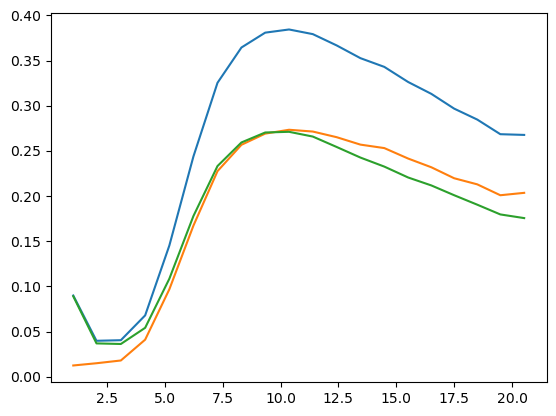

In [13]:
plt.plot(l_t[1:],va_tot_t[1:])
plt.plot(l_t[1:],va_perp_t[1:])
plt.plot(l_t[1:],va_para_t[1:])

In [19]:
r = np.corrcoef((d['rho'][:,:,212:300]).ravel(), (((d['vel1']**2+d['vel2']**2+d['vel3']**2)**0.5)[:,:,212:300]).ravel())[0, 1]

In [21]:
r = np.corrcoef((d['rho'][:,:,212:300]).ravel(), (((d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2)**0.5)[:,:,212:300]).ravel())[0, 1]

In [22]:
r

np.float64(0.4229855981563628)

In [3]:
# Perform FFT on the 3D array
shape = np.shape((d['Bcc1']**2+d['Bcc2']**2+d['Bcc3']**2)[:,:,:])
fft_Ek = np.fft.fftshift(np.fft.fftn(((d['vel1']**2+d['vel2']**2+d['vel3']**2))[:,:,:]))

# Generate wavevector coordinates ranging from -k to k
kz = np.fft.fftfreq(shape[0])
ky = np.fft.fftfreq(shape[1])
kx = np.fft.fftfreq(shape[2])

# Shift zero frequency component to the center
kz = np.fft.fftshift(kz)*(shape[0]/1)
ky = np.fft.fftshift(ky)*(shape[1]/1)
kx = np.fft.fftshift(kx)*(shape[2]/2)

# Create a 3D meshgrid for the wavevectors
Kz, Ky, Kx = np.meshgrid(kz, ky, kx, indexing='ij')
# Kz, Ky = np.meshgrid(kz, ky, indexing='ij')

In [4]:
fft_vx = np.fft.fftshift(np.fft.fftn(d['vel1']))
fft_vy = np.fft.fftshift(np.fft.fftn(d['vel2']))
fft_vz = np.fft.fftshift(np.fft.fftn(d['vel3']))

k2 = (Kx**2 + Ky**2 + Kz**2)

fft_vx_s = (Kx*fft_vx+Ky*fft_vy+Kz*fft_vz)*Kx/k2
fft_vy_s = (Kx*fft_vx+Ky*fft_vy+Kz*fft_vz)*Ky/k2
fft_vz_s = (Kx*fft_vx+Ky*fft_vy+Kz*fft_vz)*Kz/k2

fft_vx_c = fft_vx-fft_vx_s
fft_vy_c = fft_vy-fft_vy_s
fft_vz_c = fft_vz-fft_vz_s

vx_s = np.fft.ifftn(np.fft.ifftshift(fft_vx_s))
vy_s = np.fft.ifftn(np.fft.ifftshift(fft_vy_s))
vz_s = np.fft.ifftn(np.fft.ifftshift(fft_vz_s))

vx_c = np.fft.ifftn(np.fft.ifftshift(fft_vx_c))
vy_c = np.fft.ifftn(np.fft.ifftshift(fft_vy_c))
vz_c = np.fft.ifftn(np.fft.ifftshift(fft_vz_c))


/tmp/ipykernel_2099347/3630496664.py:7: RuntimeWarning: invalid value encountered in divide
  fft_vx_s = (Kx*fft_vx+Ky*fft_vy+Kz*fft_vz)*Kx/k2
/tmp/ipykernel_2099347/3630496664.py:8: RuntimeWarning: invalid value encountered in divide
  fft_vy_s = (Kx*fft_vx+Ky*fft_vy+Kz*fft_vz)*Ky/k2
/tmp/ipykernel_2099347/3630496664.py:9: RuntimeWarning: invalid value encountered in divide
  fft_vz_s = (Kx*fft_vx+Ky*fft_vy+Kz*fft_vz)*Kz/k2


In [7]:
k = np.sqrt(Kx**2 + Ky**2 + Kz**2)
power_spectrum = np.abs(fft_vx_c**2+fft_vy_c**2+fft_vy_c**2)
# power_spectrum = np.abs(fft_Ek)

# Bin the k-values to compute the spectrum
k_bins = np.linspace(np.min(k), (np.max(k)), num=100)  # Adjust bin size as needed
energy_spectrum = np.zeros(len(k_bins) - 1)

# Compute the energy in each bin
for i in range(len(k_bins) - 1):
    bin_mask = (k >= k_bins[i]) & (k < k_bins[i + 1])
    energy_spectrum[i] = np.sum(power_spectrum[bin_mask])

# Compute the center of each bin for plotting
bin_centers = 0.5 * (k_bins[:-1] + k_bins[1:])

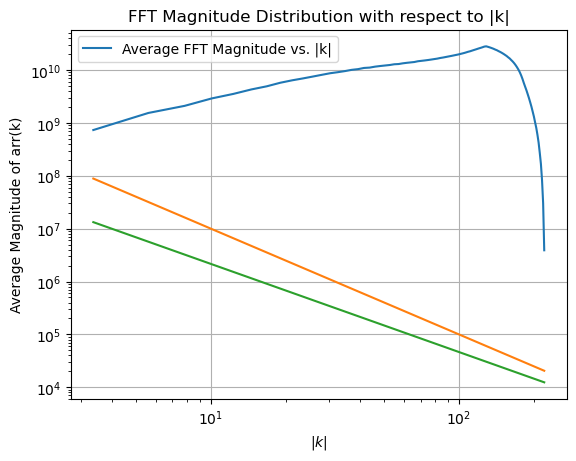

In [8]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**9)
plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**8)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

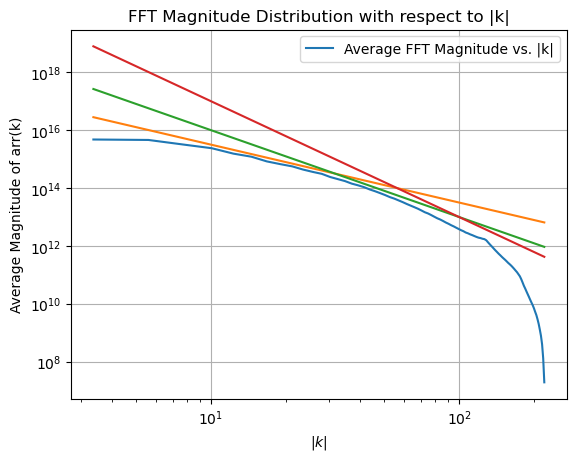

In [23]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**17.5)
plt.plot(bin_centers[1:],bin_centers[1:]**(-3)*10**19)
plt.plot(bin_centers[1:],bin_centers[1:]**(-4)*10**21)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

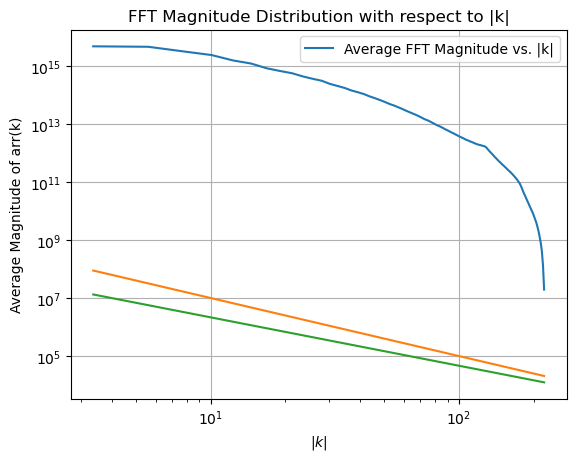

In [13]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
plt.plot(bin_centers[1:],bin_centers[1:]**(-2)*10**9)
plt.plot(bin_centers[1:],bin_centers[1:]**(-5/3)*10**8)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

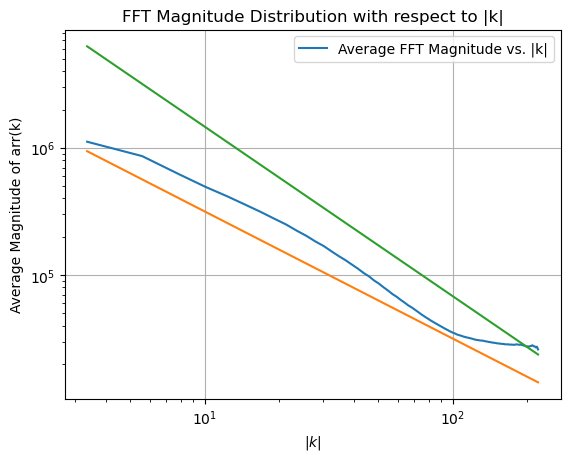

In [45]:
# Plot the distribution
plt.plot(bin_centers[1:], energy_spectrum[1:], label='Average FFT Magnitude vs. |k|')
plt.plot(bin_centers[1:],bin_centers[1:]**(-1)*10**6.5)
plt.plot(bin_centers[1:],bin_centers[1:]**(-4/3)*10**7.5)
plt.xlabel(r'$|k|$')
plt.ylabel('Average Magnitude of arr(k)')
plt.title('FFT Magnitude Distribution with respect to |k|')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()